# Aim of the Project

**We aim to analyze the growth and market dominance of major players in the used-car resale market (Cars24, CarWale, Spinny, etc.), using exploratory data analysis and predictive modeling. This analysis will provide insights into revenue trends, market share distribution, customer engagement, and vehicle lifecycle to support potential investors or new entrants assessing market viability.**

In [1]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('cars24_20221210.csv')

In [3]:
df.head()

,name,make,model,city,year,fueltype,kilometerdriven,ownernumber,transmission,bodytype,storename,isc24assured,registrationcity,registrationstate,benefits,discountprice,price,url,createdDate
0,Hyundai Elite i20,Hyundai,Elite I20,Kochi,2017,Petrol,35939,2,Manual,Hatchback,Kochi-Pns,False,Kozhikode,Kerala,13898,47399,607000,https://www.cars24.com/buy-used-hyundai-elite-...,2022-03-24
1,Maruti Alto 800,Maruti,Alto 800,Mumbai,2016,Petrol + Cng,6180,1,Manual,Hatchback,Hi-West Mumbai,False,Mumbai,Maharashtra,12542,2099,326000,https://www.cars24.com/buy-used-maruti-alto-80...,2022-11-09
2,Maruti Dzire,Maruti,Dzire,Lucknow,2019,Petrol + Cng,46808,1,Manual,Sedan,Vibhuti Khand - Gomti Nagar,False,Lucknow,Uttar Pradesh,13898,26000,640000,https://www.cars24.com/buy-used-maruti-dzire-2...,2022-09-30
3,KIA SELTOS,Kia,Seltos,Bangalore,2020,Diesel,26045,1,Manual,SUV,Bengaluru-Pns,False,Bengaluru,Karnataka,9688,143700,1354000,https://www.cars24.com/buy-used-kia-seltos-202...,2022-07-04
4,Maruti Ertiga,Maruti,Ertiga,Kolkata,2017,Petrol,53056,1,Manual,SUV,Hi-Kolkata,False,Barrackpore,West Bengal,13898,22800,676000,https://www.cars24.com/buy-used-maruti-ertiga-...,2022-10-28


In [4]:
print ("We have ",df.shape[0]," number of Rows in our Dataset")
print ("We have ",df.shape[1]," number of Columns in our Dataset")

We have  6437  number of Rows in our Dataset
We have  19  number of Columns in our Dataset


In [5]:
## checking null values
null_counts = df.isnull().sum()
null_counts[null_counts > 0]

transmission    376
bodytype        375
dtype: int64

In [6]:
# Filling missing values in 'transmission' and 'bodytype' with 'Unknown'
df['transmission'] = df['transmission'].fillna('Unknown')
df['bodytype'] = df['bodytype'].fillna('Unknown')

In [7]:
df.duplicated().sum()

np.int64(15)

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
print("\nDescriptive Statistics for Numerical Columns:")
print(df.describe())

print("\nDescriptive Statistics for Categorical Columns:")
print(df.describe(include='object'))


Descriptive Statistics for Numerical Columns:
              year  kilometerdriven  ownernumber      benefits  discountprice  \
count  6422.000000      6422.000000  6422.000000   6422.000000    6422.000000   
mean   2017.636718     41585.697291     1.235752  12081.752102   23553.318904   
std       2.657746     26194.619845     0.454617   2459.171545   41609.748768   
min    2008.000000        64.000000     1.000000   9688.000000 -155500.000000   
25%    2016.000000     20617.000000     1.000000   9688.000000    -100.000000   
50%    2018.000000     38205.000000     1.000000  12542.000000   10650.000000   
75%    2020.000000     59359.750000     1.000000  13898.000000   37075.000000   
max    2022.000000    455601.000000     3.000000  19407.000000  388300.000000   

              price  
count  6.422000e+03  
mean   6.781921e+05  
std    3.451704e+05  
min    1.340000e+05  
25%    4.390000e+05  
50%    5.880000e+05  
75%    8.290000e+05  
max    3.048000e+06  

Descriptive Statistics f

In [10]:
# Replace negative discounts with 0
df['discountprice'] = df['discountprice'].apply(lambda x: x if x >= 0 else 0)

# Outliers

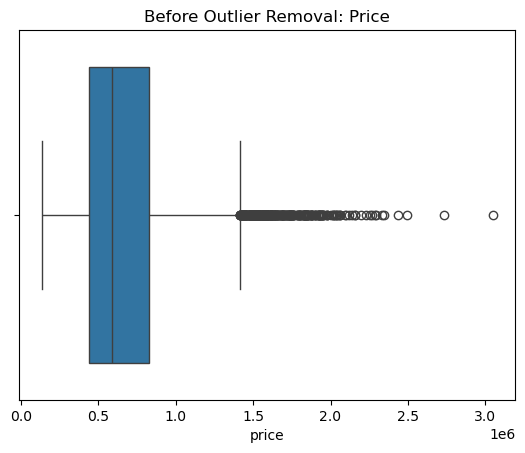

In [11]:
# Before removing outliers
sns.boxplot(x=df['price'])
plt.title("Before Outlier Removal: Price")
plt.show()

In [12]:
from scipy.stats import zscore
import numpy as np

def remove_outliers_zscore(df, column, threshold=3):
    df = df.copy()
    df[f'{column}_Zscore'] = np.abs(zscore(df[column]))
    
    outliers = df[df[f'{column}_Zscore'] > threshold]
    cleaned_df = df[df[f'{column}_Zscore'] <= threshold].drop(columns=[f'{column}_Zscore'])

    print(f"\n- Column: {column}")
    print(f"   - Z-score Threshold: {threshold}")
    print(f"   - Outliers Removed: {outliers.shape[0]}")
    print(f"   - Remaining Rows  : {cleaned_df.shape[0]}")
    
    return cleaned_df

In [13]:
df = remove_outliers_zscore(df, 'price')


- Column: price
   - Z-score Threshold: 3
   - Outliers Removed: 116
   - Remaining Rows  : 6306


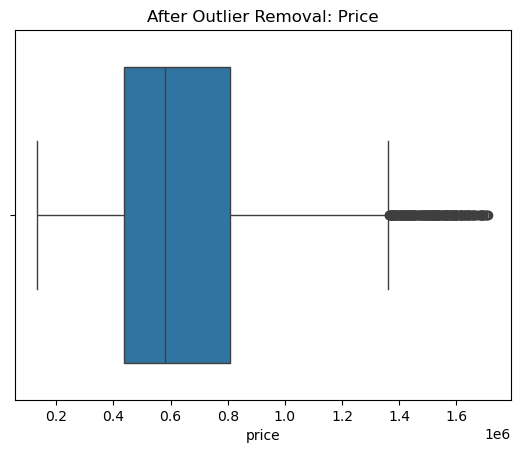

In [14]:
# After removing outliers
sns.boxplot(x=df['price'])
plt.title("After Outlier Removal: Price")
plt.show()

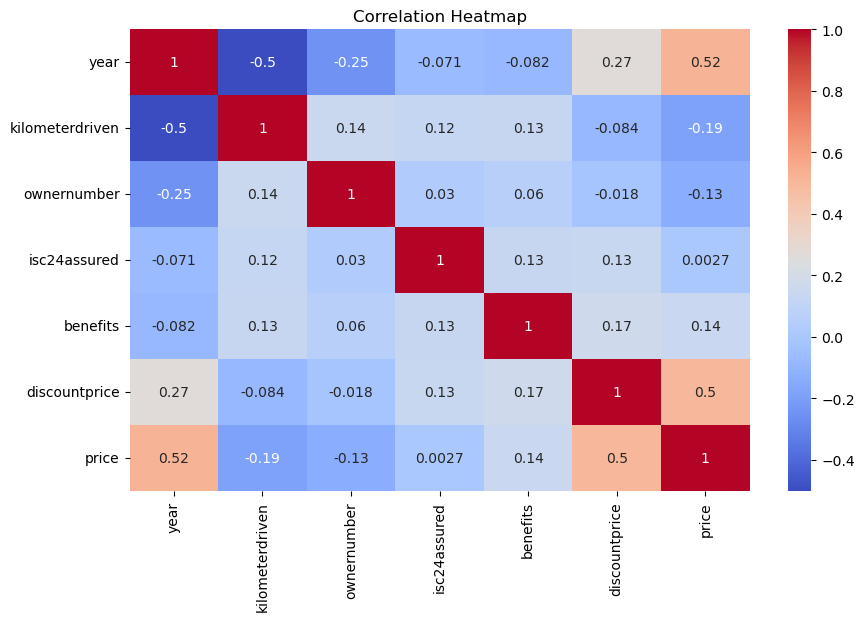

In [15]:
# Plot correlations
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

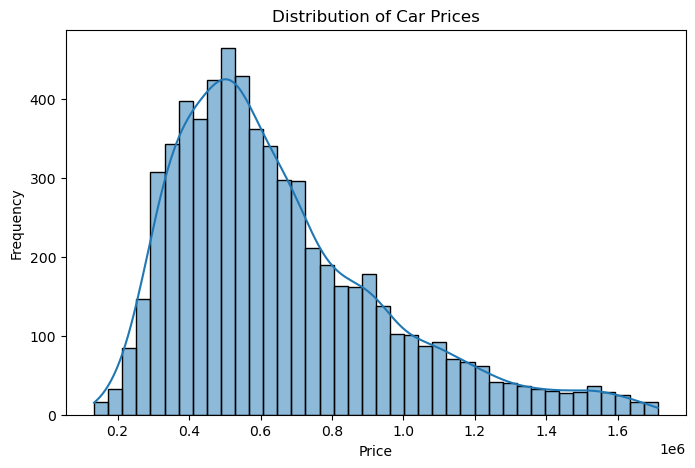

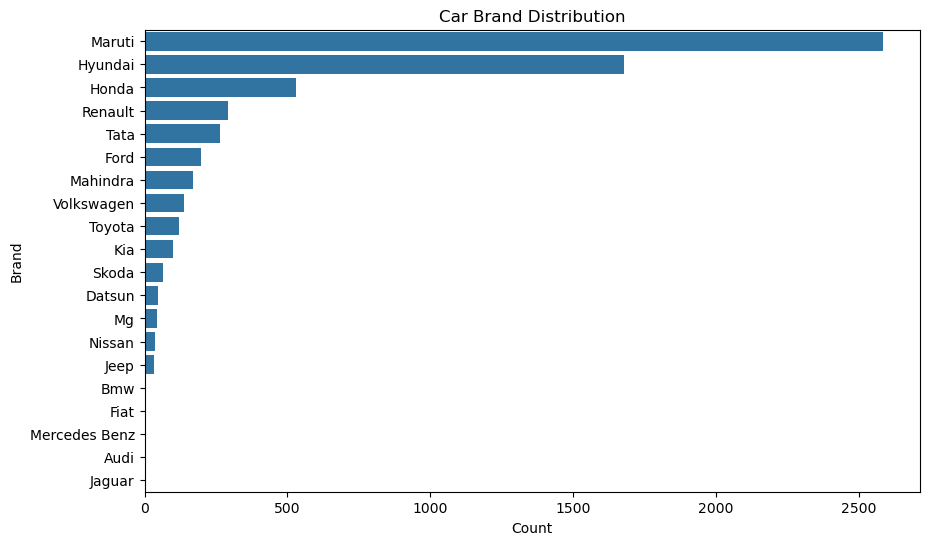

In [16]:
plt.figure(figsize=(8, 5))
sns.histplot(df['price'], kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(y='make', data=df, order=df['make'].value_counts().index)
plt.title('Car Brand Distribution')
plt.xlabel('Count')
plt.ylabel('Brand')
plt.show()

Text(0.5, 1.0, 'Price Distribution')

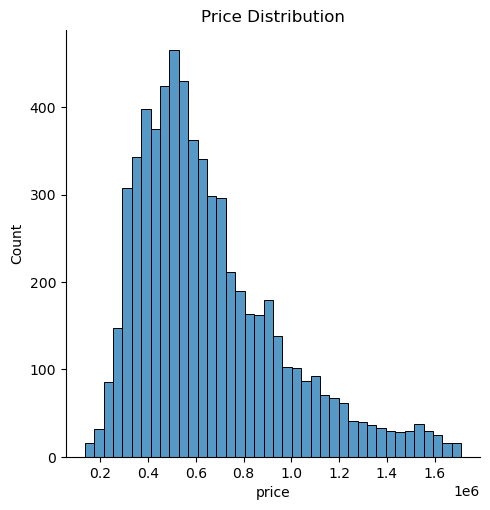

In [17]:
sns.displot(df['price'])
plt.title('Price Distribution')

In [18]:
log_price = np.log(df['price'])

df['log_price'] = log_price

df.head()

,name,make,model,city,year,fueltype,kilometerdriven,ownernumber,transmission,bodytype,storename,isc24assured,registrationcity,registrationstate,benefits,discountprice,price,url,createdDate,log_price
0,Hyundai Elite i20,Hyundai,Elite I20,Kochi,2017,Petrol,35939,2,Manual,Hatchback,Kochi-Pns,False,Kozhikode,Kerala,13898,47399,607000,https://www.cars24.com/buy-used-hyundai-elite-...,2022-03-24,13.316284
1,Maruti Alto 800,Maruti,Alto 800,Mumbai,2016,Petrol + Cng,6180,1,Manual,Hatchback,Hi-West Mumbai,False,Mumbai,Maharashtra,12542,2099,326000,https://www.cars24.com/buy-used-maruti-alto-80...,2022-11-09,12.694653
2,Maruti Dzire,Maruti,Dzire,Lucknow,2019,Petrol + Cng,46808,1,Manual,Sedan,Vibhuti Khand - Gomti Nagar,False,Lucknow,Uttar Pradesh,13898,26000,640000,https://www.cars24.com/buy-used-maruti-dzire-2...,2022-09-30,13.369223
3,KIA SELTOS,Kia,Seltos,Bangalore,2020,Diesel,26045,1,Manual,SUV,Bengaluru-Pns,False,Bengaluru,Karnataka,9688,143700,1354000,https://www.cars24.com/buy-used-kia-seltos-202...,2022-07-04,14.118574
4,Maruti Ertiga,Maruti,Ertiga,Kolkata,2017,Petrol,53056,1,Manual,SUV,Hi-Kolkata,False,Barrackpore,West Bengal,13898,22800,676000,https://www.cars24.com/buy-used-maruti-ertiga-...,2022-10-28,13.423948


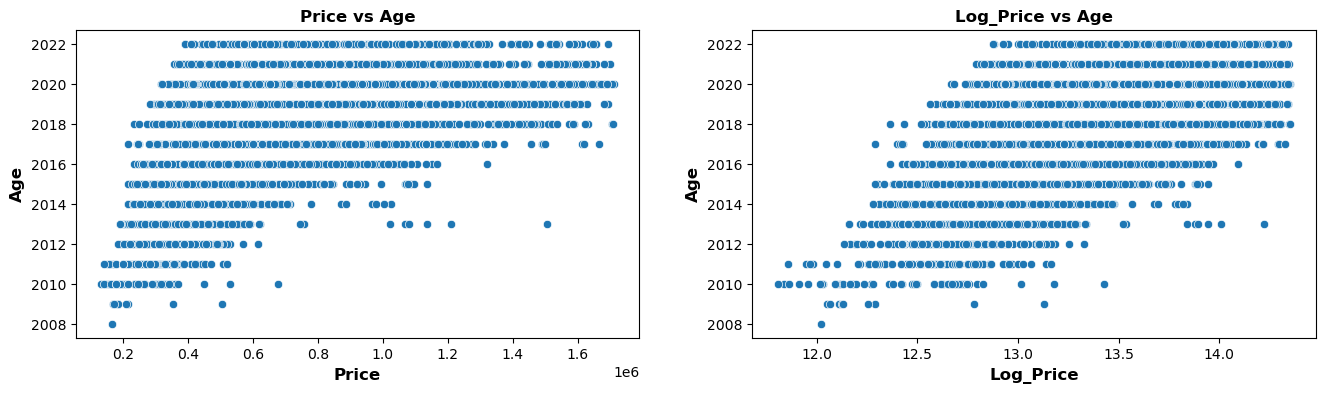

In [19]:
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
sns.scatterplot(data=df,x='price',y='year',palette='rocket')
plt.title('Price vs Age',size=12,color='black',weight='bold')
plt.xlabel('Price',size=12,color='black',weight='bold')
plt.ylabel('Age',size=12,color='black',weight='bold')

plt.subplot(1,2,2)
sns.scatterplot(data=df,x='log_price',y='year',palette='rocket')
plt.title('Log_Price vs Age',size=12,color='black',weight='bold')
plt.xlabel('Log_Price',size=12,color='black',weight='bold')
plt.ylabel('Age',size=12,color='black',weight='bold')
plt.show()

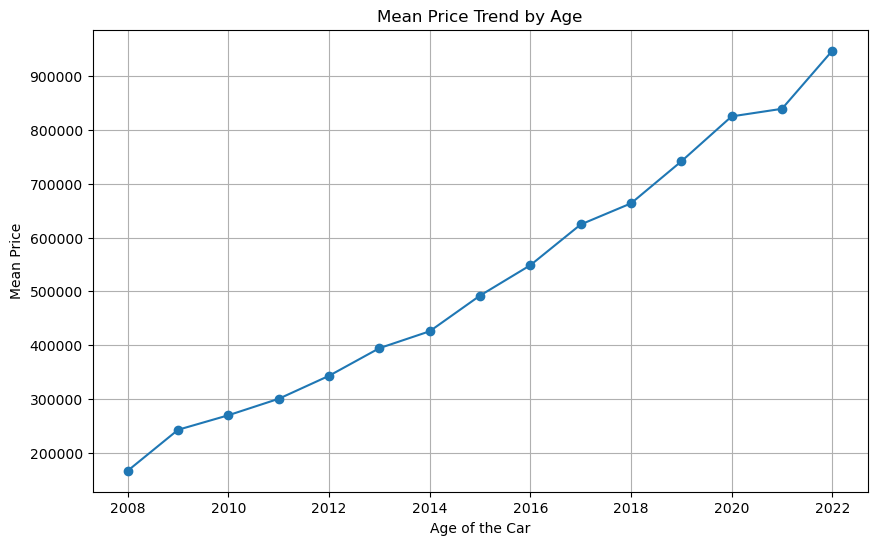

In [26]:
plt.figure(figsize=(10, 6))
df.groupby('year')['price'].mean().plot(kind='line', marker='o')
plt.title('Mean Price Trend by Age')
plt.xlabel('Age of the Car')
plt.ylabel('Mean Price')
plt.grid(True)

Text(0.5, 1.0, 'Kilometer Driven vs Log_Price')

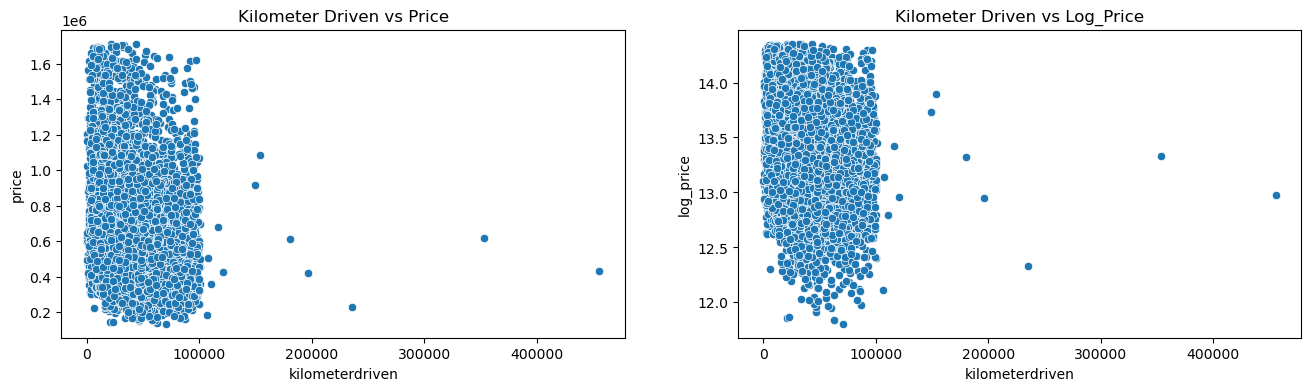

In [20]:
plt.figure(figsize=(16,4))

plt.subplot(1,2,1)
sns.scatterplot(x=df['kilometerdriven'],y=df['price'])
plt.title('Kilometer Driven vs Price')

plt.subplot(1,2,2)
sns.scatterplot(x=df['kilometerdriven'],y=df['log_price'])
plt.title('Kilometer Driven vs Log_Price')

In [21]:
df.columns

Index(['name', 'make', 'model', 'city', 'year', 'fueltype', 'kilometerdriven',
       'ownernumber', 'transmission', 'bodytype', 'storename', 'isc24assured',
       'registrationcity', 'registrationstate', 'benefits', 'discountprice',
       'price', 'url', 'createdDate', 'log_price'],
      dtype='object')

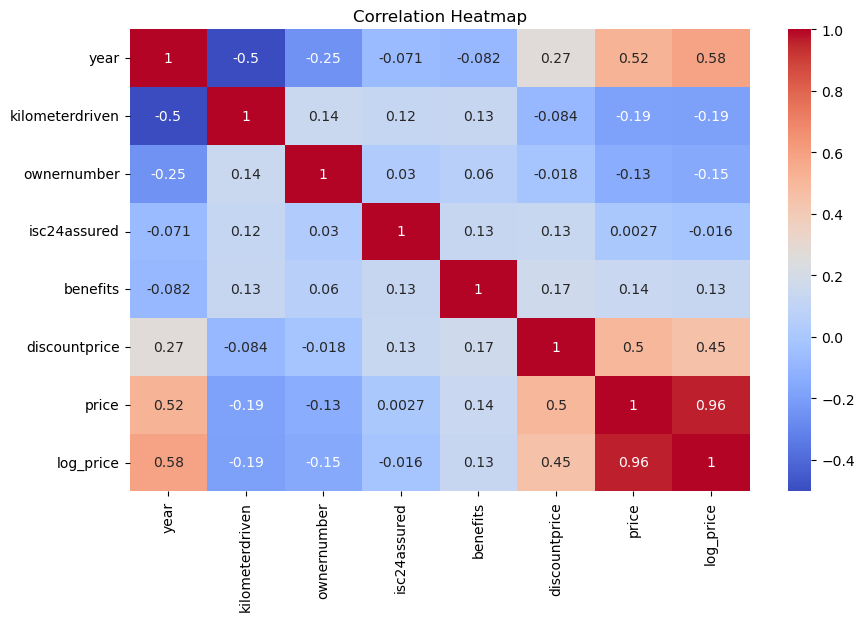

In [22]:
# Plot correlations
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

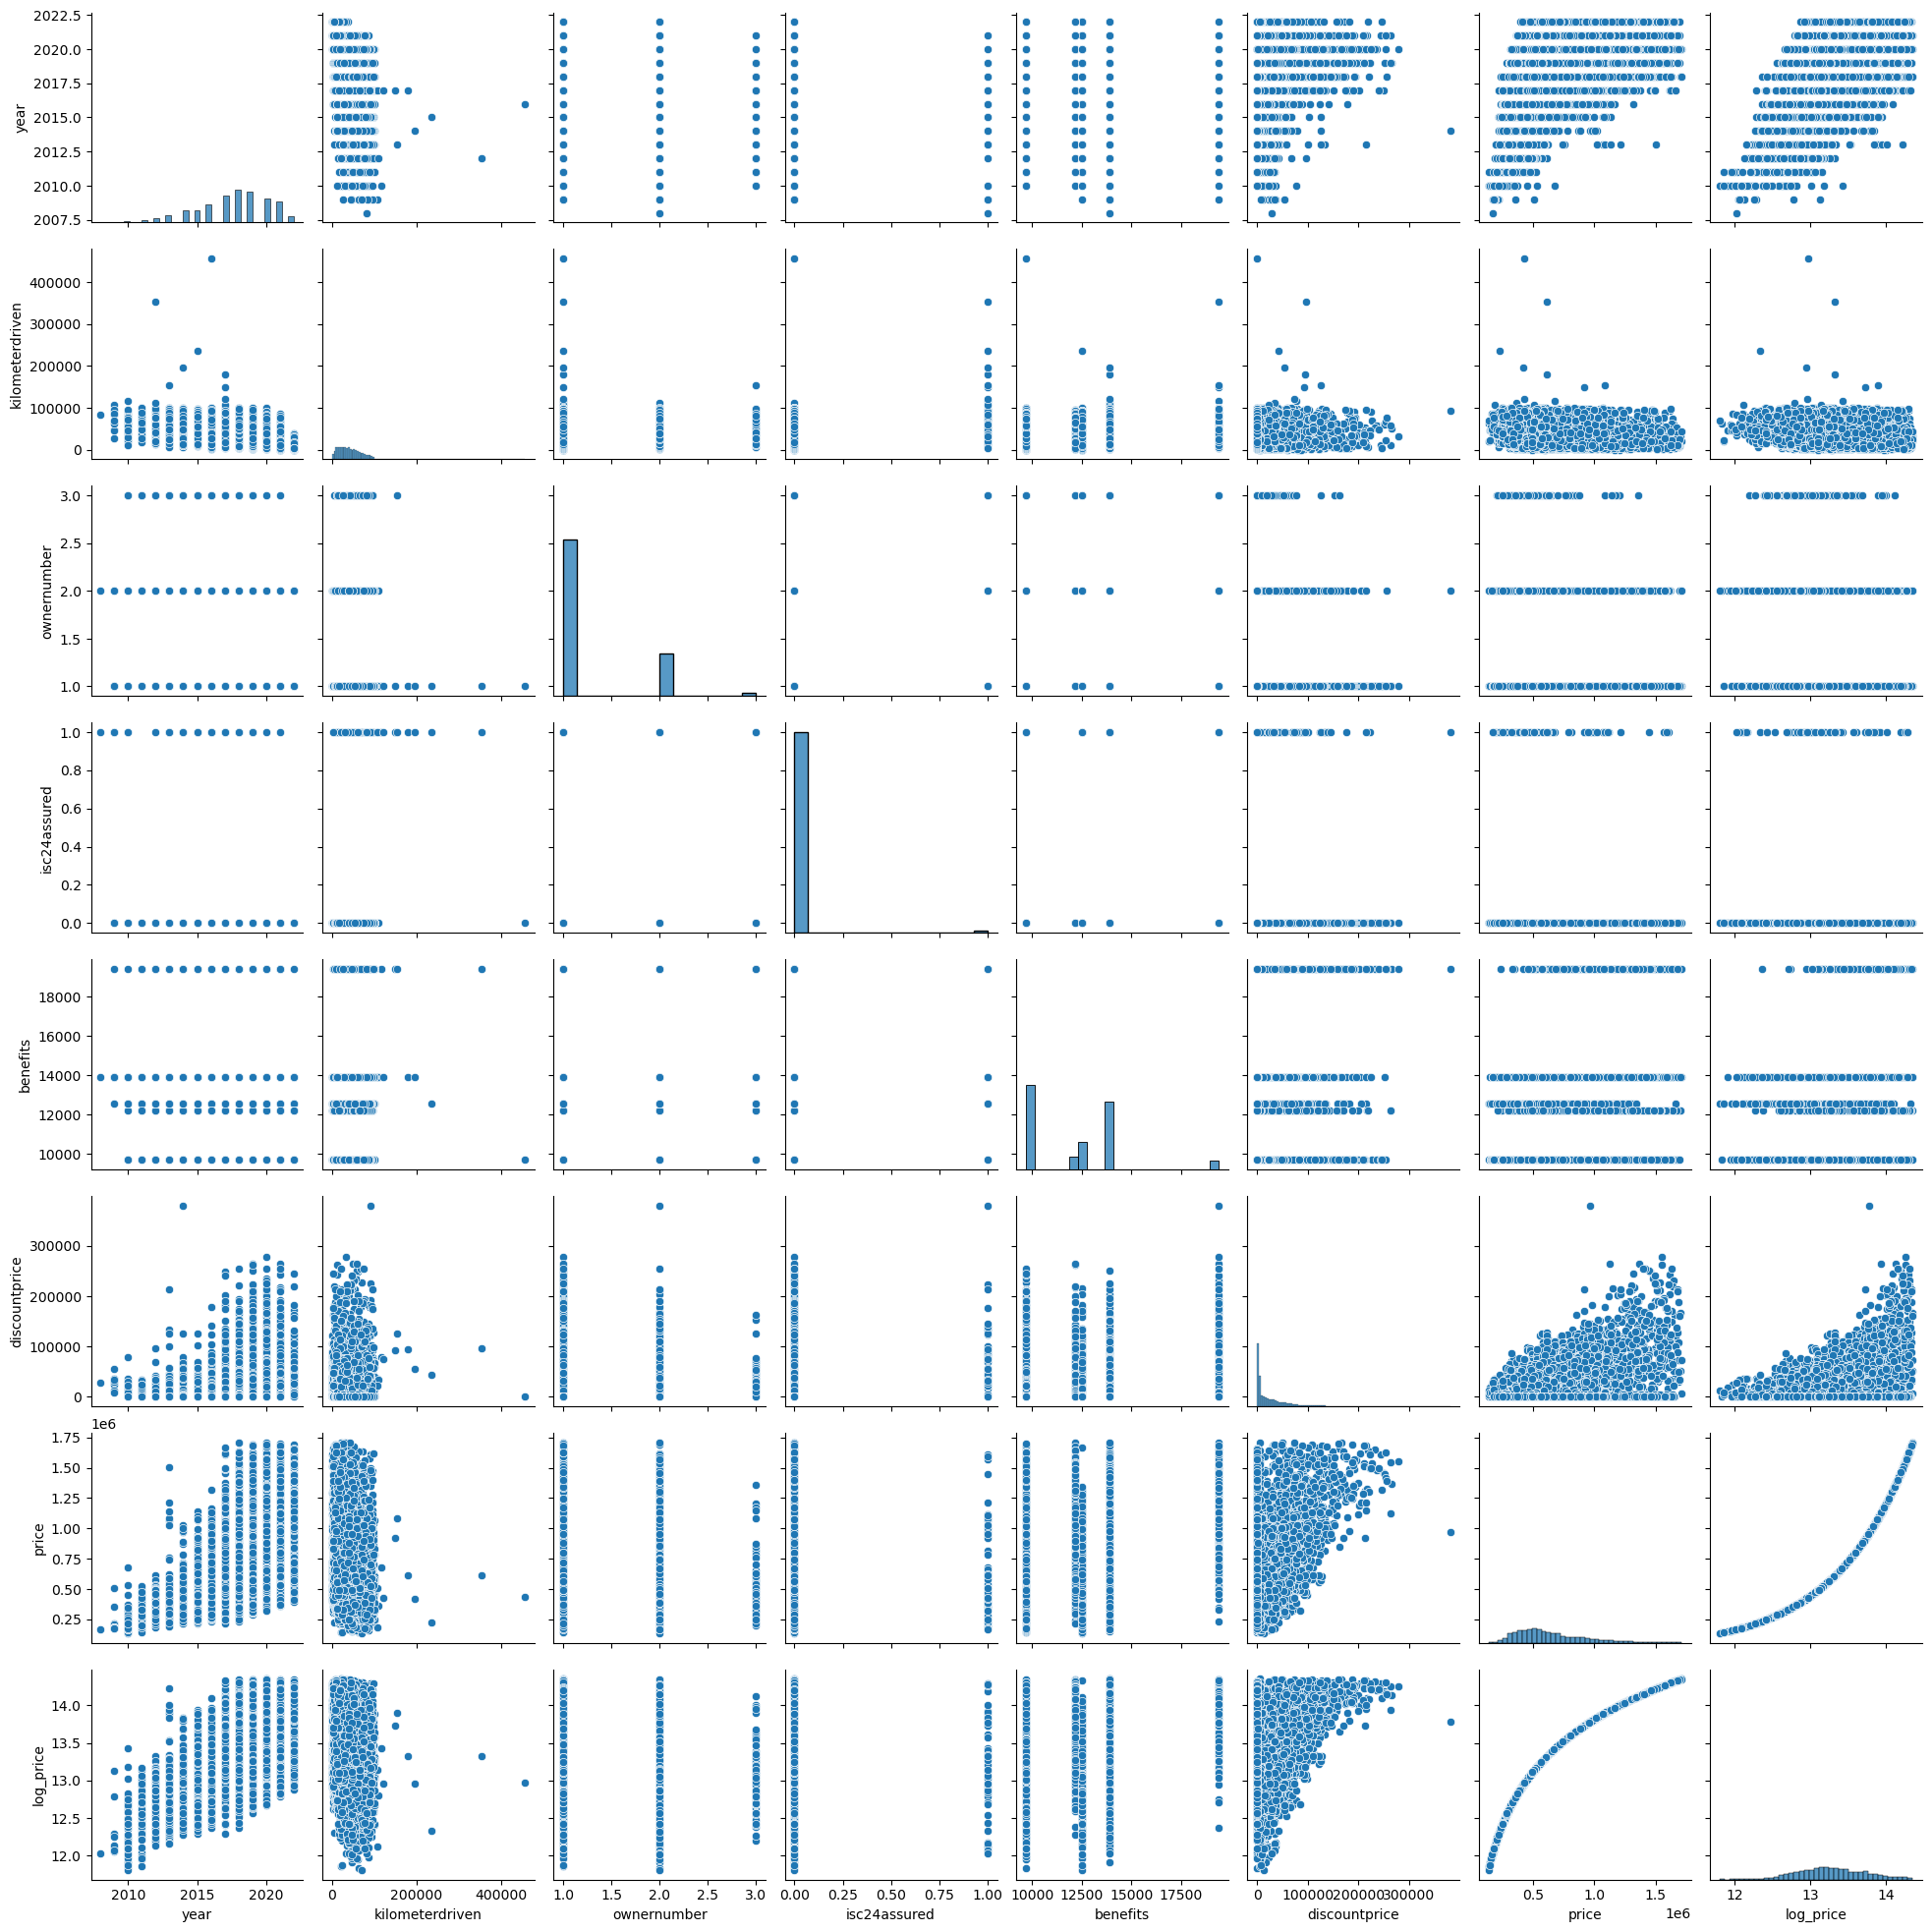

In [27]:
sns.pairplot(df)
plt.show()

##  EDA Summary

### 1. Data Overview
- Checked data types, non-null values, and overall structure.

### 2. Missing Values
- Handled missing values by imputation:
  - **Mean** for numerical columns
  - **Mode** for categorical columns

### 3. Descriptive Statistics
- Gained insights into:
  - Central tendency (mean, median)
  - Spread (standard deviation, IQR)
  - Distribution of numerical features

### 4. Data Visualization
- Used plots to understand data patterns and feature relationships:
  - Histograms
  - Count plots
  - Scatter plots
  - HeatMap
  - Pair plots

### 5. Outlier Identification
- Identified and removed outliers using:
  - Z-score method
### 6. Feature Engineering
- Applied log transformation on skewed data (e.g., `log_price`)

---

##  Next Steps
- Encode categorical variables
- Split data into training and testing sets
- Proceed with model building and evaluation
